# Predicting H1N1 Flu Vaccination Status: A Machine Learning Approach

## Overview

In this project, data from the National Flu Survey (NHFS 2009) was utilized to predict whether or not respondents received the H1N1 vaccine. Past vaccination patterns are crucial to understand in order to comprehend those of more recent pandemics, such as COVID-19. The most influential factors determining vaccination status are Doctor Recommendation of the H1N1 vaccine, Health Insurance, opinion of H1N1 Vaccine effectiveness, and opinion of H1N1 risk. Six machine learning models were employed for making predictions, including Decision Tree Classifier, Logistic Regression, Random Forest, K-Nearest Neighborhood Classifier, Gradient Boosting Classifier, and XG Boosting Classifier. The Gradient Boosting Classifier yielded the best accuracy and precision score.

## Business Problem

Vaccination, as one of the most successful public health interventions ever implemented, has led to the elimination and control of diseases that were once common throughout the world. Despite overwhelming medical evidence and the unanimous position of medical professionals in favor of vaccination, the number of people skeptical about vaccination has grown in many countries in recent years. The consequence of this alarming trend is a decline in immunization coverage. Several outbreaks of infectious diseases have been linked to undervaccinated communities. The problem of expanding vaccine rejection has begun to be so widespread that it became the subject of many studies aimed at understanding the sources and correlations of attitudes toward vaccination.

The aim of this study is to predict how likely individuals are to receive their H1N1 flu vaccine. It is believed that the prediction outputs (model and analysis) of this study will give public health professionals and policy makers a clear understanding of factors associated with low vaccination rates. This, in turn, enables them to systematically act on those features hindering people from getting vaccinated.

The methodologies used in these models can serve as a reference for future work and can also be compared with different models for performance evaluation. Considering the data type and objectives, multiple machine learning classification models, such as Logistic regression, Decision tree, Random forest, kNN, Gradient Boosting, and XGBoosting, were implemented.

In order to classify exactly those who received the H1N1 flu shot from those who did not, a higher accuracy of the model outputs, as well as a high precision score, which is related to a low false positive rate (those who considered vaccinated but did actually not get the H1N1 flu shot), are needed. This will be further assessed using the ROC curve, accuracy score, precision score, and confusion matrix.

## Summary of Business Understanding

**End Users**: Public health officials of the American Public Health Association (APHA)

**True business problem**:
- Accurate prediction of vaccination status: (Deliverable: Model)
- Identification of factors influencing individuals' decision to get the H1N1 vaccine or not: (Deliverable: Analysis)

**Context**:
- False negatives: Individuals wrongly classified as not vaccinated when they actually are.
- Outcome: Not deemed critical.

- False positives: Individuals wrongly classified as vaccinated when they are not.
- Outcome: Considered significant.

**Evaluation**:
Accuracy, precision, and F1 scores will be prioritized for model iterations to minimize false positives, as they are more detrimental in our business context than false negatives.

- **Accuracy**
- **Precision**
- Recall
- **F1-Score**

In [1]:
# Importing Relevant Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FixedLocator

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

import category_encoders as ce

from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, cross_val_score

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

import xgboost     # extreme gradient boosting

# To visualize the 100 many the columns in data
pd.options.display.max_columns=100

## Data Understanding

This data comes from a NHFS National Flu Survey from 2009, which inquires about whether or not people received the seasonal flu and/or the H1N1 flu vaccination, as well as their demographic, behavioral, and health factors. There are 26,000 respondents to this survey. In this project we chose H1N1 vaccination rate as our target variable. We used all features in the survey, and filled missing values using the Iterative Imputer. 

In [101]:
# The data is loaded
df = pd.read_csv('./H1N1_Flu_Vaccines.csv')

# The first few rows of the data are displayed
df.head()


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [102]:
# The percentage breakdown of the two classes in one possible target (seasonal flu rate) is explored
df['seasonal_vaccine'].value_counts(normalize=True)

seasonal_vaccine
0    0.534392
1    0.465608
Name: proportion, dtype: float64

In [103]:
# The percentage breakdown of the two classes in a possible target (H1N1 flu rate) is explored.
df['h1n1_vaccine'].value_counts(normalize=True)   # A class imbalance problem is observed.

h1n1_vaccine
0    0.787546
1    0.212454
Name: proportion, dtype: float64

In [104]:
# Th info about null values is obtained
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [105]:
# The number of null values is obtained
df.isna().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [106]:
# Numerical columns are explored
df.describe()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,24547.000000,25736.000000,25887.000000,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,0.329735,0.283261,0.082590,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454,0.465608
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,0.470126,0.450591,0.275266,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052,0.498825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000,1.000000


In [107]:
# Object columns are explored
df[[c for c in df.columns if df[c].dtype =='object']].describe()

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation
count,26707,25300,26707,26707,22284,25299,24665,25244,26707,26707,13377,13237
unique,5,4,4,2,3,2,2,3,10,3,21,23
top,65+ Years,College Graduate,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,lzgpxyit,"MSA, Not Principle City",fcxhlnwr,xtkaffoo
freq,6843,10097,21222,15858,12777,13555,18736,13560,4297,11645,2468,1778


The decision was made to select the H1N1 vaccination rate as the target variable, as many of the features are associated with H1N1 vaccination. This target variable presents a class imbalance issue that we aim to address in this project.

## EDA

The visualizations provided represent the top four most influential features in determining vaccination status for H1N1. Additional exploratory visualizations can be found in the notebooks located within the notebook folder.

In [108]:
# A copy of the main dataframe is created to be used for visualizations
df2 = df.copy()


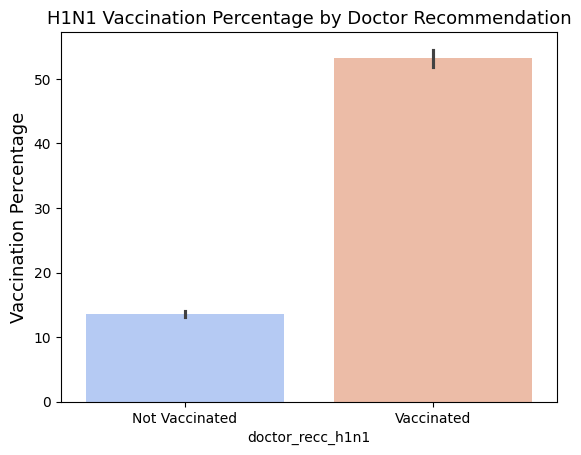

In [109]:
# A graph is created to visualize the relationship between H1N1 vaccination and doctor recommendation
dr = sns.barplot(x=df2['doctor_recc_h1n1'].dropna(), y=df2['h1n1_vaccine']*100, hue=df2['doctor_recc_h1n1'], palette='coolwarm', legend=False)

# Set the tick positions on the x-axis
dr.set_xticks([0, 1])

# The x-axis tick labels are adjusted to 'Not Vaccinated' and 'Vaccinated'
dr.set_xticklabels(['Not Vaccinated', 'Vaccinated'])

# The y-axis label is set to 'Vaccination Percentage' with a font size of 13
dr.set_ylabel('Vaccination Percentage', fontsize=13)

# The title of the graph is set to 'H1N1 Vaccination Percentage by Doctor Recommendation' with a font size of 13
dr.set_title('H1N1 Vaccination Percentage by Doctor Recommendation', fontsize=13)

plt.show()

In [110]:
# A dictionary is created for mapping in order to generate better names for the x-axis in the graphs below
ins_dict = {1: 'Health Insurance',
            0: 'No Health Insurance'}

In [111]:
# The column used to create clear x-axis tick marks in the graph below is created by replacing the health insurance words in 'df2' with the values from 'ins_dict'
df2['health_ins_words'] = df2['health_insurance'].replace(ins_dict)

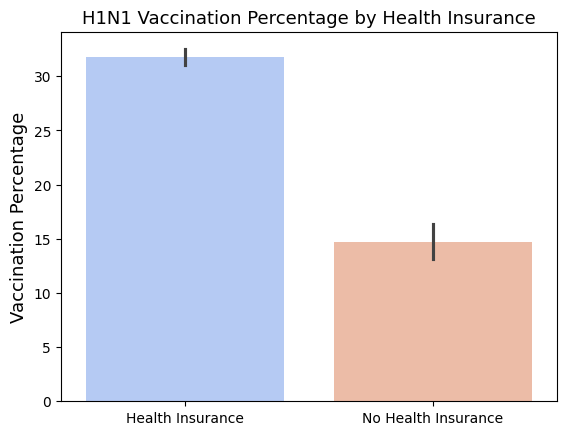

In [112]:
# A bar plot is created to visualize the relationship between health insurance and H1N1 vaccination percentage
ins = sns.barplot(x=df2['health_ins_words'], y=df2['h1n1_vaccine']*100, hue=df2['health_ins_words'], palette='coolwarm', legend=False)

# The x-axis label is set to empty
ins.set_xlabel('')

# The y-axis label is set to 'Vaccination Percentage' with a font size of 13
ins.set_ylabel('Vaccination Percentage', fontsize=13)

# The title of the plot is set to 'H1N1 Vaccination Percentage by Health Insurance' with a font size of 13
ins.set_title('H1N1 Vaccination Percentage by Health Insurance', fontsize=13);


Text(0.5, 1.0, 'H1N1 Vaccination Percentage by Effectiveness Belief')

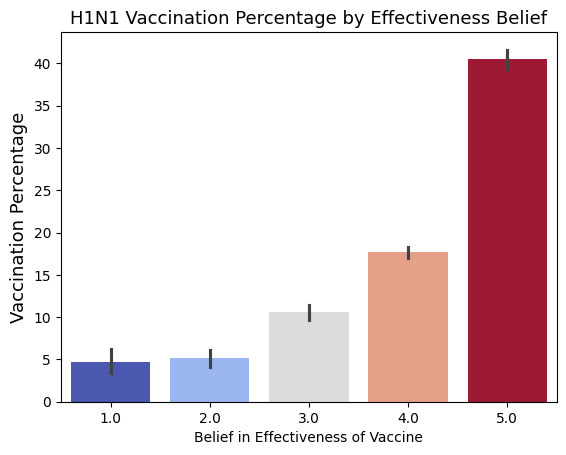

In [113]:
# A graph is created to show the differentiation in vaccine percentage depending on the opinion of effectiveness of H1N1 Vaccine
ins = sns.barplot(x=df2['opinion_h1n1_vacc_effective'].dropna(), y=df2['h1n1_vaccine']*100, hue=df2['opinion_h1n1_vacc_effective'], palette='coolwarm', legend=False)

# The x-axis label is set to 'Belief in Effectiveness of Vaccine'
ins.set_xlabel('Belief in Effectiveness of Vaccine')

# The y-axis label is set to 'Vaccination Percentage'
ins.set_ylabel('Vaccination Percentage', fontsize=13)

# The title of the graph is set to 'H1N1 Vaccination Percentage by Effectiveness Belief'
ins.set_title('H1N1 Vaccination Percentage by Effectiveness Belief', fontsize=13)


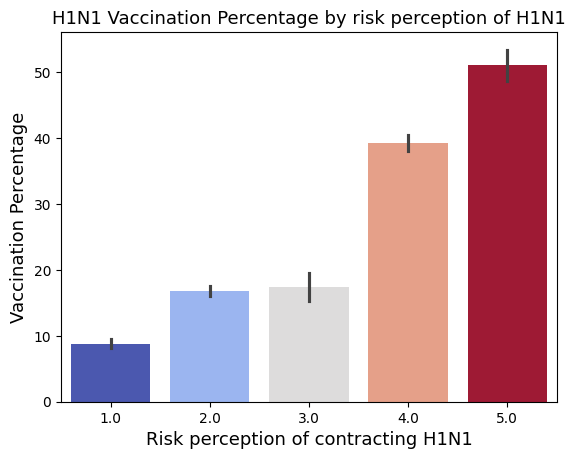

In [114]:
# A risk graph is created to explore vaccine percentage depending on risk perception of H1N1
ins = sns.barplot(x=df2['opinion_h1n1_risk'].dropna(), y=df2['h1n1_vaccine']*100, hue=df2['opinion_h1n1_risk'], palette='coolwarm', legend=False)

# The x-axis label is set to describe the risk perception of contracting H1N1
ins.set_xlabel('Risk perception of contracting H1N1', fontsize=13)

# The y-axis label is set to describe the vaccination percentage
ins.set_ylabel('Vaccination Percentage', fontsize=13)

# The title of the graph is set to describe the relationship between H1N1 vaccination percentage and risk perception of H1N1
ins.set_title('H1N1 Vaccination Percentage by risk perception of H1N1', fontsize=13)

plt.show()

## Data Preparation

Several changes were made to the dataset. Firstly, the "respondent_id" and "seasonal_vaccine" columns were dropped as they were deemed irrelevant for the analysis. Additionally, new columns were added due to the transformation of categorical columns using OneHotEncoder. Null values were filled using Iterative Imputer, chosen as a preferable alternative to simple imputer for the dataset. Category names were replaced with frequency counts using CountEncoder for columns with more than 10 unique categories. Pipelines were employed to enhance the efficiency of preprocessing and modeling and to mitigate against data leakage. Furthermore, the training and testing data were split twice to ensure the availability of a holdout set for assessing the generalizability of the final model.

In [115]:
# X and y are defined
X = df.drop(columns=['respondent_id', 'h1n1_vaccine', 'seasonal_vaccine'], axis=1)
y = df['h1n1_vaccine']

In [116]:
# Data is split into training and holdout sets
X_train, X_hold, y_train, y_hold = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)


In [117]:
# Train and test sets are split using regular train-test split method
X_tr, X_te, y_tr, y_te = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

Used the stratify argument for y (our target) in both splits to help deal with the class imbalance problem.

In [118]:
# Lists are set up for each column datatype
num_cols = []
ohe_cols = []
freq_cols = []

# Iterate over each column to categorize them based on their datatype
for c in X.columns:
    if X[c].dtype in ['float64', 'int64']:
        # If the datatype of the column is numeric,
        # it is appended to the list of numeric columns
        num_cols.append(c)
    elif X[c].nunique() < 10:
        # If the number of unique values in the column is less than 10,
        # it is considered categorical and appended to the list of one-hot encoded columns
        ohe_cols.append(c)
    else:
        # Otherwise, the column is considered categorical with many unique values
        # and is appended to the list of frequency encoded columns
        freq_cols.append(c)


In [119]:
# Each column category is displayed
print(f'Numerical Columns:', num_cols)
print('\n')
print(f'Object Columns (containing less than 10 unique values):', ohe_cols)
print('\n')
print(f'Object Columns (containing more than 10 unique values):', freq_cols)

Numerical Columns: ['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal', 'chronic_med_condition', 'child_under_6_months', 'health_worker', 'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults', 'household_children']


Object Columns (containing less than 10 unique values): ['age_group', 'education', 'race', 'sex', 'income_poverty', 'marital_status', 'rent_or_own', 'employment_status', 'census_msa']


Object Columns (containing more than 10 unique values): ['hhs_geo_region', 'employment_industry', 'employment_occupation']


In [120]:
# Pipelines for preprocessing
num_transformer = Pipeline(steps=[
    ('num_imputer', IterativeImputer(max_iter=100, random_state=42)),   # Missing values are replaced with IterativeImputer
    ('minmaxscaler', MinMaxScaler())                                    # Numerical features are scaled using MinMaxScaler
])

ohe_transformer = Pipeline(steps=[
    ('ohe_imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),  # Missing categories are handled by SimpleImputer
    ('ohe_encoder', OneHotEncoder(handle_unknown='ignore'))                     # Each category is encoded into a new column
])

freq_transformer = Pipeline(steps=[
    ('freq_encoder', ce.count.CountEncoder(normalize=True, min_group_size=.05)), # Category names are replaced with frequency counts using CountEncoder
    ('freq_imputer', IterativeImputer(max_iter=100, random_state=42))            # Missing values are replaced with IterativeImputer
])


In [121]:
# The preprocessor is defined using a ColumnTransformer, which packages all components together
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('ohe', ohe_transformer, ohe_cols),
        ('freq', freq_transformer, freq_cols)
    ])

In [122]:
# The preprocessor is fitted to observe the components as a whole
preprocessor.fit(X_tr)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('num_imputer',
                                                  IterativeImputer(max_iter=100,
                                                                   random_state=42)),
                                                 ('minmaxscaler',
                                                  MinMaxScaler())]),
                                 ['h1n1_concern', 'h1n1_knowledge',
                                  'behavioral_antiviral_meds',
                                  'behavioral_avoidance',
                                  'behavioral_face_mask',
                                  'behavioral_wash_hands',
                                  'behavioral_large_gatherings',
                                  'behavioral_outside_home',
                                  'behavioral...
                                 ['age_group', 'education', 'race', 'sex',
                                  'income_poverty', 'marital_status',
                                  'rent_or_own', 'employment_status',
                                  'census_msa']),
                                ('freq',
                                 Pipeline(steps=[('freq_encoder',
                                                  CountEncoder(combine_min_nan_groups=True,
                                                               min_group_size=0.05,
                                                               normalize=True)),
                                                 ('freq_imputer',
                                                  IterativeImputer(max_iter=100,
                                                                   random_state=42))]),
                                 ['hhs_geo_region', 'employment_industry',
                                  'employment_occupation'])])

In [123]:
# Let's observe what the data looks like after the preprocessor transformation
X_tr_transformed = preprocessor.transform(X_tr)
# The shape of the transformed data is examined
X_tr_transformed_shape = X_tr_transformed.shape

In [124]:
# To visualize it, a Pandas dataframe is used. 
pd.DataFrame(X_tr_transformed).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58
0,1.000000,0.5,0.016076,0.963804,0.038064,0.894508,0.0,1.000000,0.0,0.116478,0.141558,1.0,0.0,1.000000,0.779010,0.75,0.296807,0.75,0.75,0.279800,0.75,0.333333,0.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.106407,0.499168,0.504213
1,0.666667,1.0,0.016076,0.000000,0.038064,0.894508,0.0,0.013143,1.0,0.116478,0.141558,0.0,0.0,0.110629,0.920662,0.75,0.765602,0.25,0.75,0.759933,0.25,0.333333,0.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.160235,0.340961,0.371854
2,0.333333,0.5,0.016076,0.963804,0.038064,0.894508,0.0,0.013143,0.0,1.000000,1.000000,0.0,0.0,0.110629,0.920662,0.75,0.296807,0.00,1.00,0.279800,0.00,0.333333,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.076659,0.499168,0.504213
3,0.333333,0.5,0.016076,0.963804,0.038064,0.894508,0.0,0.013143,1.0,0.116478,1.000000,0.0,0.0,0.110629,0.920662,0.75,0.296807,0.25,0.75,0.279800,0.25,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.160235,0.499168,0.504213
4,0.333333,1.0,0.016076,0.963804,0.038064,0.894508,0.0,0.013143,1.0,0.116478,0.141558,0.0,1.0,1.000000,0.920662,0.25,0.062409,0.00,0.75,0.279800,0.25,0.666667,0.333333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.160235,0.340961,0.371854


In each model, the preprocessor will be incorporated into the modeling pipeline to ensure that null values are filled and categorical variables are transformed.

## Modeling

A variety of different models were used to find the most accurate model. Because there are many different hyperparameters for each model and the optimal combinations were not known, GridSearchCV was employed to find the best combinations for each model. Class weight was specified to be balanced in order to address the class imbalance issue for the models, whenever possible. Accuracy score, precision score, F1 score, and ROC-AUC curve were analyzed for each model. The different ROC-AUC curves of each model were also compared to choose the final model. Additionally, the confusion matrix was examined closely to determine whether false positives were being minimized. The Gradient Boosting Classifier provided the best accuracy and precision scores, so it was selected as the final model.

### Baseline Understanding

- Let's use DummyClassifier to make prediction based on the most frequent class in the target variable, which is 0 in our case. 

In [125]:
def evaluate(estimator, X_train, X_test, y_train, y_test, roc_auc='roc_auc'):
    # Predictions are made on the training and testing data
    train_out = estimator.predict(X_train)
    test_out = estimator.predict(X_test)

    # Training scores are calculated and printed
    print("Training Scores:")
    print(f"Train Accuracy: {accuracy_score(y_train, train_out)}")
    print(f"Train Precision: {precision_score(y_train, train_out, zero_division=0)}")
    print(f"Train Recall: {recall_score(y_train, train_out)}")
    print(f"Train F1-Score: {f1_score(y_train, train_out)}")
    print("*********")

    # Testing scores are calculated and printed
    print("Testing Scores:")
    print(f"Test Accuracy: {accuracy_score(y_test, test_out)}")
    print(f"Test Precision: {precision_score(y_test, test_out, zero_division=0)}")
    print(f"Test Recall: {recall_score(y_test, test_out)}")
    print(f"Test F1-Score: {f1_score(y_test, test_out)}")

    # If ROC-AUC score is not skipped, it is printed
    if roc_auc != 'skip':
        print(f"ROC-AUC: {roc_auc_score(y_test, test_out)}")

    # Confusion matrix is computed and plotted for the test set
    cm = confusion_matrix(y_test, test_out)
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.colorbar()
    plt.xticks(np.arange(len(estimator.classes_)), estimator.classes_, rotation=90)
    plt.yticks(np.arange(len(estimator.classes_)), estimator.classes_)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('Confusion Matrix')
    plt.show()


In [126]:
# The dummy model through the pipeline setup
dummy_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DummyClassifier(strategy="most_frequent"))
])

In [127]:
# The dummy model fitting
dummy_model.fit(X_tr, y_tr)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   IterativeImputer(max_iter=100,
                                                                                    random_state=42)),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['h1n1_concern',
                                                   'h1n1_knowledge',
                                                   'behavioral_antiviral_meds',
                                                   'behavioral_avoidance',
                                                   'behavioral_face_mask',
                                                   'behavioral_wash_hands',
                                                   'behavioral_large_gatherings',
                                                   'beha...
                                                   'rent_or_own',
                                                   'employment_status',
                                                   'census_msa']),
                                                 ('freq',
                                                  Pipeline(steps=[('freq_encoder',
                                                                   CountEncoder(combine_min_nan_groups=True,
                                                                                min_group_size=0.05,
                                                                                normalize=True)),
                                                                  ('freq_imputer',
                                                                   IterativeImputer(max_iter=100,
                                                                                    random_state=42))]),
                                                  ['hhs_geo_region',
                                                   'employment_industry',
                                                   'employment_occupation'])])),
                ('classifier', DummyClassifier(strategy='most_frequent'))])

Training Scores:
Train Accuracy: 0.7875494071146245
Train Precision: 0.0
Train Recall: 0.0
Train F1-Score: 0.0
*********
Testing Scores:
Test Accuracy: 0.7874376039933444
Test Precision: 0.0
Test Recall: 0.0
Test F1-Score: 0.0


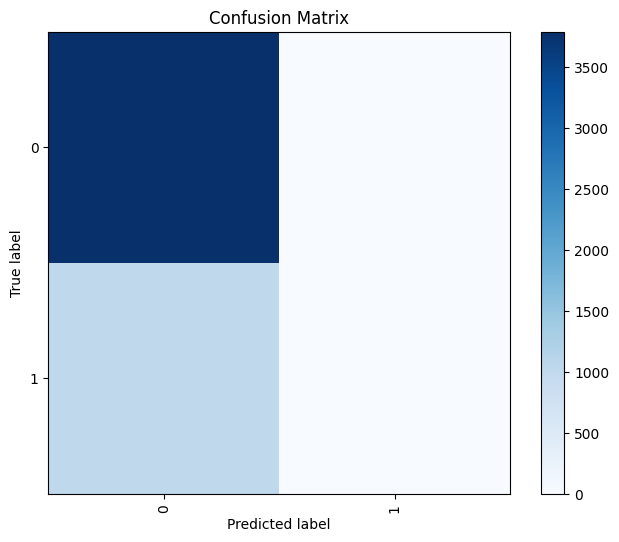

In [128]:
# Dummy model being evaluated
evaluate(dummy_model, X_tr, X_te, y_tr, y_te, roc_auc='skip')

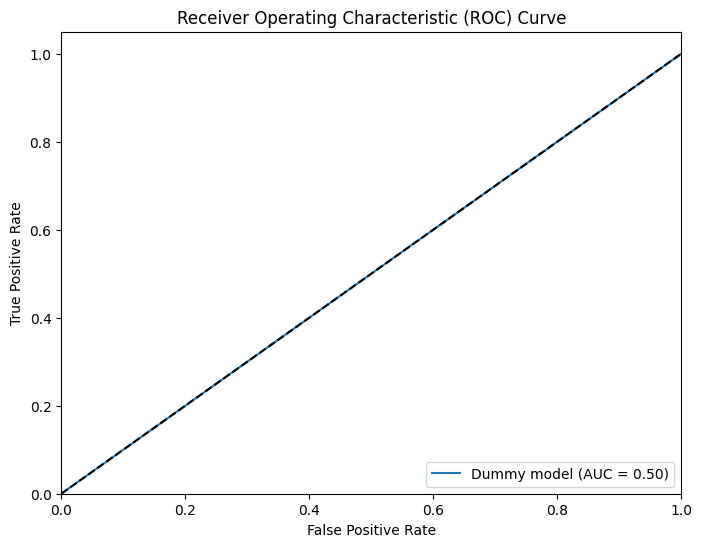

In [129]:
# The roc-auc curve for dummy model plot
def plot_roc_curve(model, X_test, y_test, name='Model'):
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

plot_roc_curve(dummy_model, X_tr, y_tr, name='Dummy model'); 

So, the mean of the accuracy score is a little over 78% if we always guess the majority class, which is 0 in this case.

### Modeling Iterations
Now, the process of iterating over multiple models will be initiated.

### MODEL 1: Decision Tree Classifier

In [130]:
# The DecisionTreeClassifier to go though the pipeline setup
dtc = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(class_weight='balanced', max_depth = 5))
])

# The parameters are chosen based on GridSearchCV done in Project3_model_iterations.ipynb notebook results!

In [131]:
# The model to the training data is fitted
dtc.fit(X_tr, y_tr)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   IterativeImputer(max_iter=100,
                                                                                    random_state=42)),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['h1n1_concern',
                                                   'h1n1_knowledge',
                                                   'behavioral_antiviral_meds',
                                                   'behavioral_avoidance',
                                                   'behavioral_face_mask',
                                                   'behavioral_wash_hands',
                                                   'behavioral_large_gatherings',
                                                   'beha...
                                                   'employment_status',
                                                   'census_msa']),
                                                 ('freq',
                                                  Pipeline(steps=[('freq_encoder',
                                                                   CountEncoder(combine_min_nan_groups=True,
                                                                                min_group_size=0.05,
                                                                                normalize=True)),
                                                                  ('freq_imputer',
                                                                   IterativeImputer(max_iter=100,
                                                                                    random_state=42))]),
                                                  ['hhs_geo_region',
                                                   'employment_industry',
                                                   'employment_occupation'])])),
                ('classifier',
                 DecisionTreeClassifier(class_weight='balanced', max_depth=5))])

Training Scores:
Train Accuracy: 0.7920220511753693
Train Precision: 0.5071858288770054
Train Recall: 0.7429620563035496
Train F1-Score: 0.6028404012315026
*********
Testing Scores:
Test Accuracy: 0.7886855241264559
Test Precision: 0.5019710906701709
Test Recall: 0.7475538160469667
Test F1-Score: 0.60062893081761


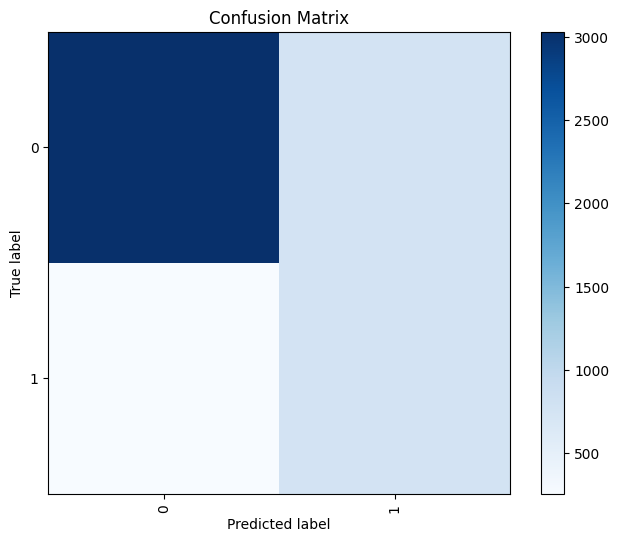

In [132]:
# The decision tree model for various metrics evaluation
evaluate(dtc, X_tr, X_te, y_tr, y_te, roc_auc='skip')

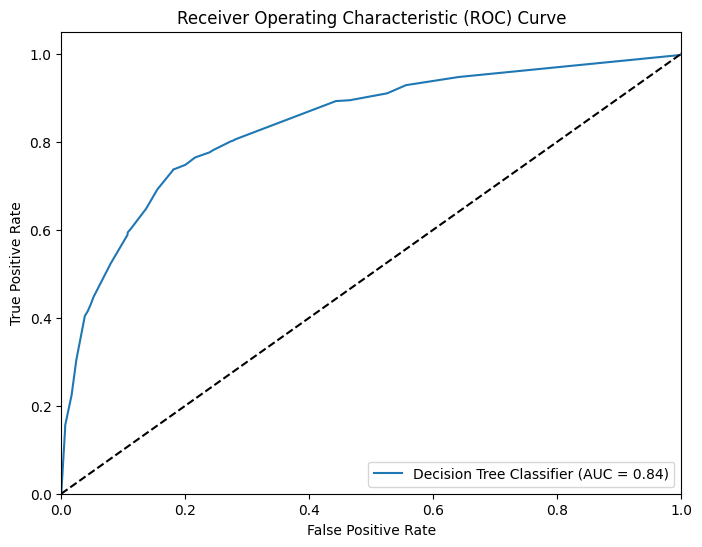

In [133]:
# The roc-auc curve for decision tree model
plot_roc_curve(dtc, X_te, y_te, name='Decision Tree Classifier'); 

This decision tree model is not overfitting, but we have a low precision score, as well as a low f1 score. However, the AUC for this model is 0.84, which is fairly high, meaning that it does an adequate job of maximizing true positives and minimizing the false positives. This model is not overfitting.

### MODEL 2: Logistic Regression

In [134]:
# The logistic regression model to go through the pipeline setup.
logreg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=500, C=1, class_weight= 'balanced', solver= 'lbfgs',           
                                      random_state=42))
])

# The parameters are chosen based on GridSearchCV done in Project3_model_iterations.ipynb notebook results!

In [135]:
# The logistic regression model on the training data
logreg.fit(X_tr, y_tr)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   IterativeImputer(max_iter=100,
                                                                                    random_state=42)),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['h1n1_concern',
                                                   'h1n1_knowledge',
                                                   'behavioral_antiviral_meds',
                                                   'behavioral_avoidance',
                                                   'behavioral_face_mask',
                                                   'behavioral_wash_hands',
                                                   'behavioral_large_gatherings',
                                                   'beha...
                                                   'census_msa']),
                                                 ('freq',
                                                  Pipeline(steps=[('freq_encoder',
                                                                   CountEncoder(combine_min_nan_groups=True,
                                                                                min_group_size=0.05,
                                                                                normalize=True)),
                                                                  ('freq_imputer',
                                                                   IterativeImputer(max_iter=100,
                                                                                    random_state=42))]),
                                                  ['hhs_geo_region',
                                                   'employment_industry',
                                                   'employment_occupation'])])),
                ('classifier',
                 LogisticRegression(C=1, class_weight='balanced', max_iter=500,
                                    random_state=42))])

Training Scores:
Train Accuracy: 0.775691699604743
Train Precision: 0.48176
Train Recall: 0.7370869033047736
Train F1-Score: 0.5826802128688922
*********
Testing Scores:
Test Accuracy: 0.778910149750416
Test Precision: 0.486950986632718
Test Recall: 0.7485322896281801
Test F1-Score: 0.590050134978789
ROC-AUC: 0.767821348194967


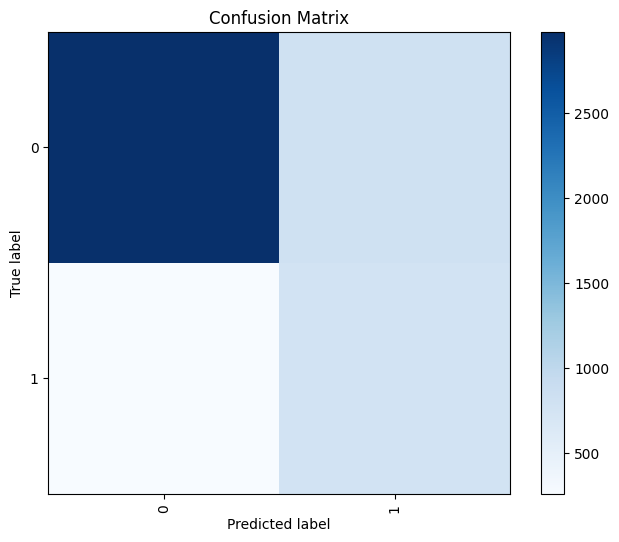

In [136]:
# The logistic regression for various metrics
evaluate(logreg, X_tr, X_te, y_tr, y_te)

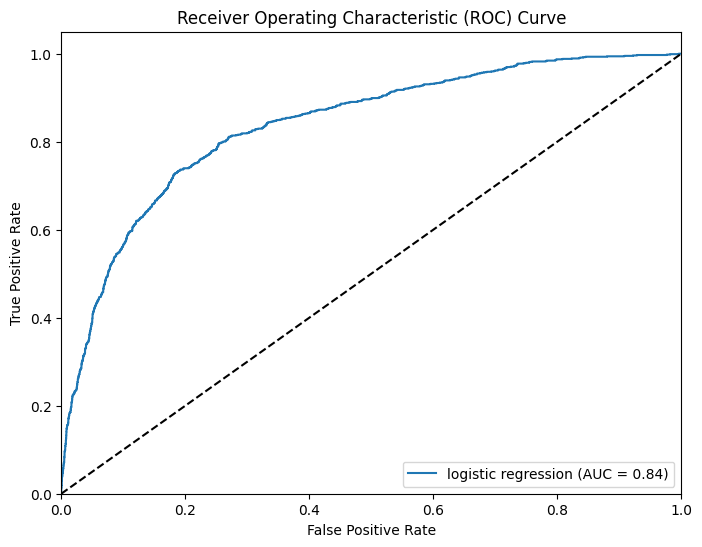

In [137]:
# The roc-auc curve for the logistic regression model is plotted.
plot_roc_curve(logreg, X_te, y_te, name='logistic regression');

This logistic regression model has low precision and fl scores, and has an AUC equal to the decision tree AUC above. This model is not overfitting.

### MODEL 3: Random Forest

In [138]:
# The RandomForestClassifier is configured to pass through the pipeline
rfc = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(class_weight= 'balanced', max_depth= 5, min_samples_leaf= 1,
                                          n_estimators= 200, random_state=42))
])

# The parameters are selected based on the results of GridSearchCV conducted in the Project3_model_iterations.ipynb notebook.

In [139]:
# The random forest model is fitted to the training data
rfc.fit(X_tr, y_tr)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   IterativeImputer(max_iter=100,
                                                                                    random_state=42)),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['h1n1_concern',
                                                   'h1n1_knowledge',
                                                   'behavioral_antiviral_meds',
                                                   'behavioral_avoidance',
                                                   'behavioral_face_mask',
                                                   'behavioral_wash_hands',
                                                   'behavioral_large_gatherings',
                                                   'beha...
                                                  Pipeline(steps=[('freq_encoder',
                                                                   CountEncoder(combine_min_nan_groups=True,
                                                                                min_group_size=0.05,
                                                                                normalize=True)),
                                                                  ('freq_imputer',
                                                                   IterativeImputer(max_iter=100,
                                                                                    random_state=42))]),
                                                  ['hhs_geo_region',
                                                   'employment_industry',
                                                   'employment_occupation'])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=5,
                                        n_estimators=200, random_state=42))])

Training Scores:
Train Accuracy: 0.7942583732057417
Train Precision: 0.5107303277324904
Train Recall: 0.7515299877600979
Train F1-Score: 0.6081616481774961
*********
Testing Scores:
Test Accuracy: 0.788269550748752
Test Precision: 0.5013245033112583
Test Recall: 0.7407045009784736
Test F1-Score: 0.5979462875197472
ROC-AUC: 0.7709069256080958


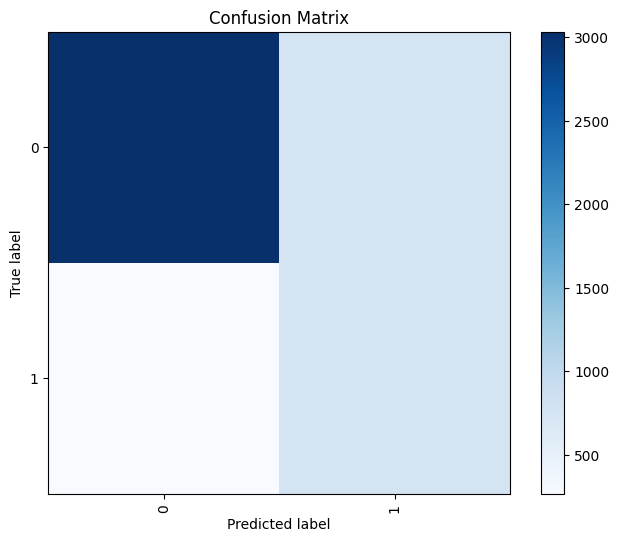

In [140]:
# Various metrics of the random forest classifier are being evaluated
evaluate(rfc, X_tr, X_te, y_tr, y_te)

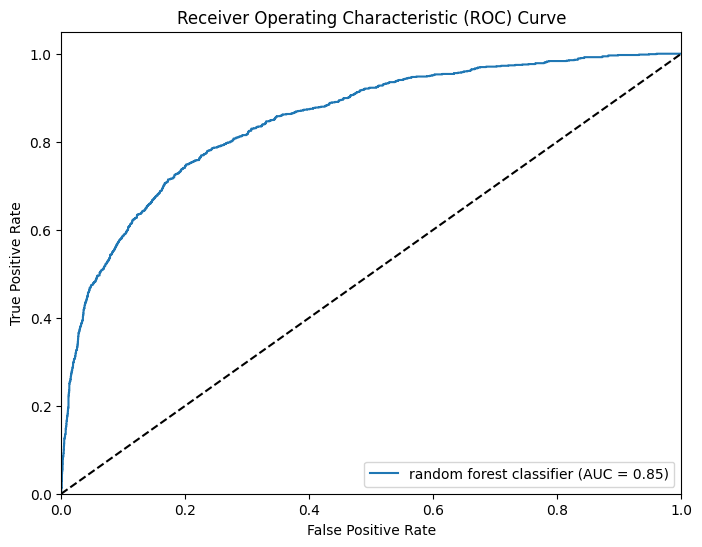

In [141]:
plot_roc_curve(rfc, X_te, y_te, name='random forest classifier');

This random forest classifier model also has low precision and fl scores. It has an AUC score of 0.85, which is slightly better than the decision tree model above. This model is not overfitting to a great extent.

### MODEL 4: kNN Classifier

In [142]:
# The KNN model is set up to go through the pipeline
kNN = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=5, p=1, weights='distance'))
])

# The parameters have been chosen based on the results of GridSearchCV conducted in the Project3_model_iterations.ipynb notebook.

In [143]:
# The KNN model is fitted to the training data
kNN.fit(X_tr, y_tr)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   IterativeImputer(max_iter=100,
                                                                                    random_state=42)),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['h1n1_concern',
                                                   'h1n1_knowledge',
                                                   'behavioral_antiviral_meds',
                                                   'behavioral_avoidance',
                                                   'behavioral_face_mask',
                                                   'behavioral_wash_hands',
                                                   'behavioral_large_gatherings',
                                                   'beha...
                                                   'rent_or_own',
                                                   'employment_status',
                                                   'census_msa']),
                                                 ('freq',
                                                  Pipeline(steps=[('freq_encoder',
                                                                   CountEncoder(combine_min_nan_groups=True,
                                                                                min_group_size=0.05,
                                                                                normalize=True)),
                                                                  ('freq_imputer',
                                                                   IterativeImputer(max_iter=100,
                                                                                    random_state=42))]),
                                                  ['hhs_geo_region',
                                                   'employment_industry',
                                                   'employment_occupation'])])),
                ('classifier', KNeighborsClassifier(p=1, weights='distance'))])

Training Scores:
Train Accuracy: 1.0
Train Precision: 1.0
Train Recall: 1.0
Train F1-Score: 1.0
*********
Testing Scores:
Test Accuracy: 0.7999168053244592
Test Precision: 0.5622406639004149
Test Recall: 0.2651663405088063
Test F1-Score: 0.3603723404255319
ROC-AUC: 0.6047173488069653


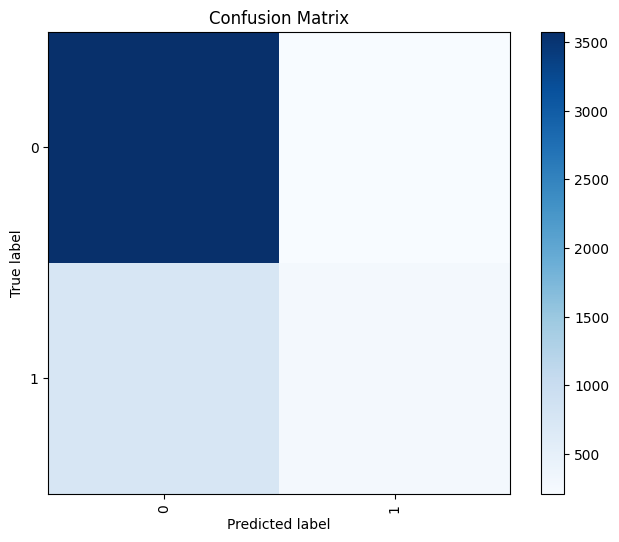

In [144]:
# The KNN model is evaluated for various metrics
evaluate(kNN, X_tr, X_te, y_tr, y_te)

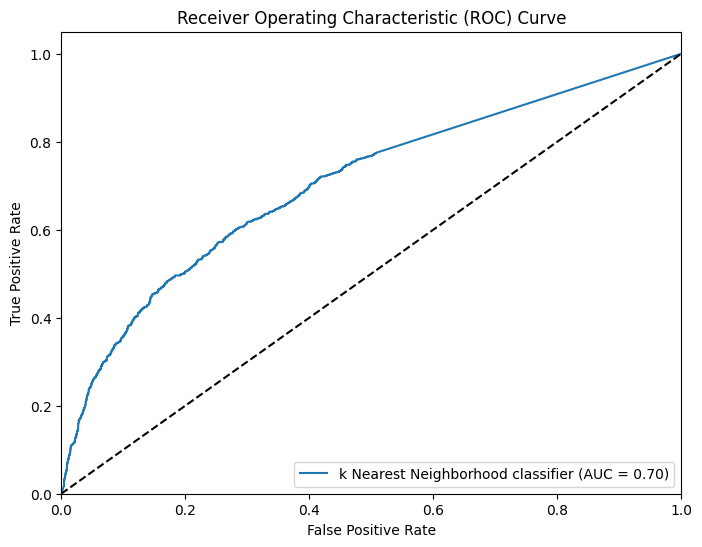

In [145]:
# The roc-auc curve is plotted for the KNN model
plot_roc_curve(kNN, X_te, y_te, name='k Nearest Neighborhood classifier');

This KNN model is definitely overfitting; the training data has perfect scores for all metrics, whereas the testing data scores are much lower. The AUC score is also much lower than on previous models.

### MODEL 5: Gradient Boosting Classifier

In [146]:
# The gradient boosting classifier is configured to pass through the pipeline
gbc = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(learning_rate= 0.1, max_depth= 5, n_estimators= 200,
        random_state=42))
])

# The parameters have been selected based on the results of GridSearchCV conducted in the Project3_model_iterations.ipynb notebook

In [147]:
# The gradient boosting classifier is fitted to the training data
gbc.fit(X_tr, y_tr)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   IterativeImputer(max_iter=100,
                                                                                    random_state=42)),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['h1n1_concern',
                                                   'h1n1_knowledge',
                                                   'behavioral_antiviral_meds',
                                                   'behavioral_avoidance',
                                                   'behavioral_face_mask',
                                                   'behavioral_wash_hands',
                                                   'behavioral_large_gatherings',
                                                   'beha...
                                                   'census_msa']),
                                                 ('freq',
                                                  Pipeline(steps=[('freq_encoder',
                                                                   CountEncoder(combine_min_nan_groups=True,
                                                                                min_group_size=0.05,
                                                                                normalize=True)),
                                                                  ('freq_imputer',
                                                                   IterativeImputer(max_iter=100,
                                                                                    random_state=42))]),
                                                  ['hhs_geo_region',
                                                   'employment_industry',
                                                   'employment_occupation'])])),
                ('classifier',
                 GradientBoostingClassifier(max_depth=5, n_estimators=200,
                                            random_state=42))])

Training Scores:
Train Accuracy: 0.895933014354067
Train Precision: 0.8400783289817232
Train Recall: 0.630110159118727
Train F1-Score: 0.7201007133864876
*********
Testing Scores:
Test Accuracy: 0.8554492512479202
Test Precision: 0.7224489795918367
Test Recall: 0.5195694716242661
Test F1-Score: 0.6044393853158794
ROC-AUC: 0.7328433728961267


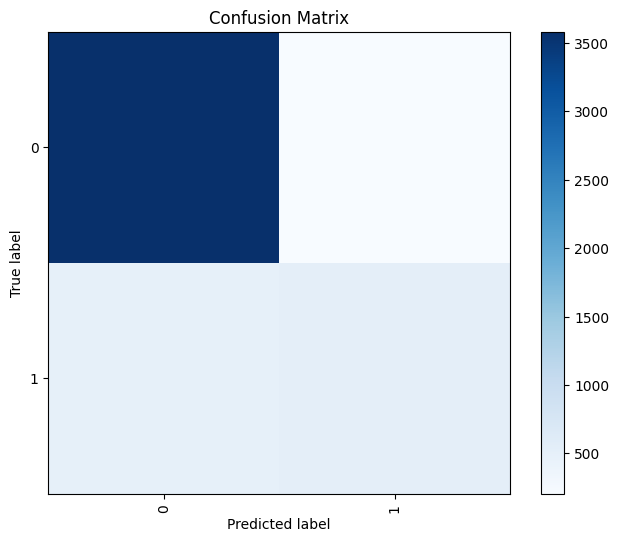

In [148]:
# The gradient boosting model is evaluated for various metrics
evaluate(gbc, X_tr, X_te, y_tr, y_te)

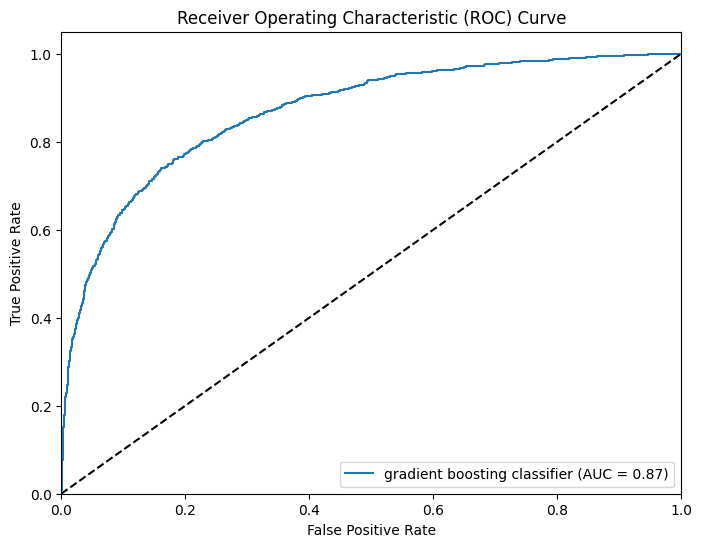

In [149]:
# The ROC-AUC curve for the gradient boosting model is plotted
plot_roc_curve(gbc, X_te, y_te, name='gradient boosting classifier');

This model has the highest overall scores of all the models done so far, and also does the best job of minimizing the false positives. This is our candidate for the final model.

### MODEL 6: XG Boosting Classifier

In [150]:
# The XG Boosting model is configured to go through the pipeline
xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', xgboost.XGBClassifier(learning_rate= 1, max_depth= 2, n_estimators= 100, random_state=42))
])

# The parameters have been chosen based on the results of the GridSearchCV performed in the Project3_model_iterations.ipynb notebook

In [151]:
# The XGBoosting model is fitted to the training data
xgb.fit(X_tr, y_tr)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   IterativeImputer(max_iter=100,
                                                                                    random_state=42)),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['h1n1_concern',
                                                   'h1n1_knowledge',
                                                   'behavioral_antiviral_meds',
                                                   'behavioral_avoidance',
                                                   'behavioral_face_mask',
                                                   'behavioral_wash_hands',
                                                   'behavioral_large_gatherings',
                                                   'beha...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=2, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

Training Scores:
Train Accuracy: 0.8637923861035989
Train Precision: 0.7505126452494874
Train Recall: 0.5375764993880049
Train F1-Score: 0.6264441591784339
*********
Testing Scores:
Test Accuracy: 0.8560732113144759
Test Precision: 0.722972972972973
Test Recall: 0.5234833659491194
Test F1-Score: 0.6072644721906924
ROC-AUC: 0.7346682545540631


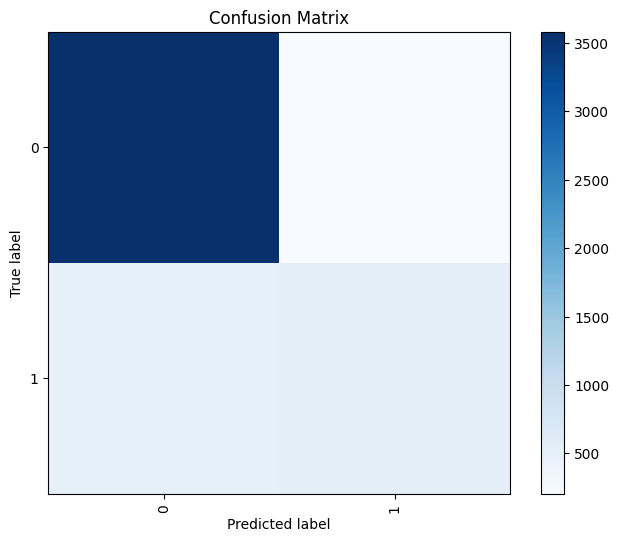

In [152]:
# XG Boost model is evaluated for various metrics
evaluate(xgb, X_tr, X_te, y_tr, y_te)

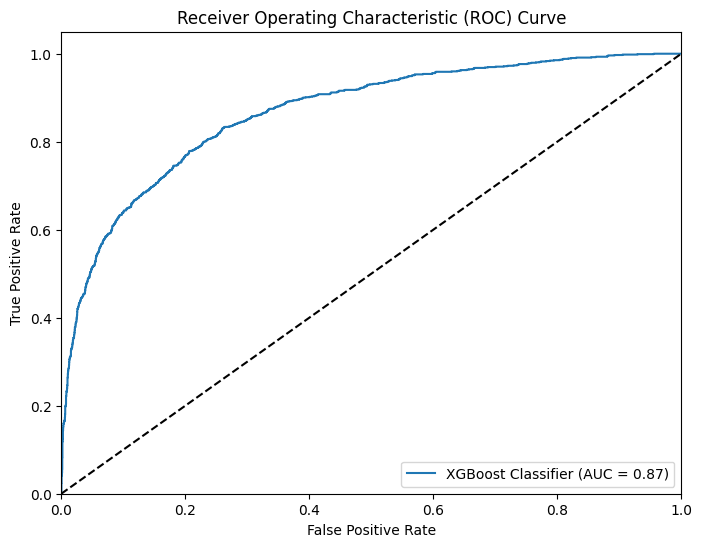

In [153]:
plot_roc_curve(xgb, X_te, y_te, name='XGBoost Classifier');

This model gave similar scores to the gradient boosting model, but the gradient boosting model has the best AUC score and precision score. So, I will choose the gradient boosting classifier as the final model.

## Comparison of Model ROC Curves

In [154]:
def plot_roc_curve(model, X_test, y_test, name='Model', ax=None):
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 6))

    ax.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver Operating Characteristic (ROC) Curve')
    ax.legend(loc="lower right")

    if ax is None:
        plt.show()

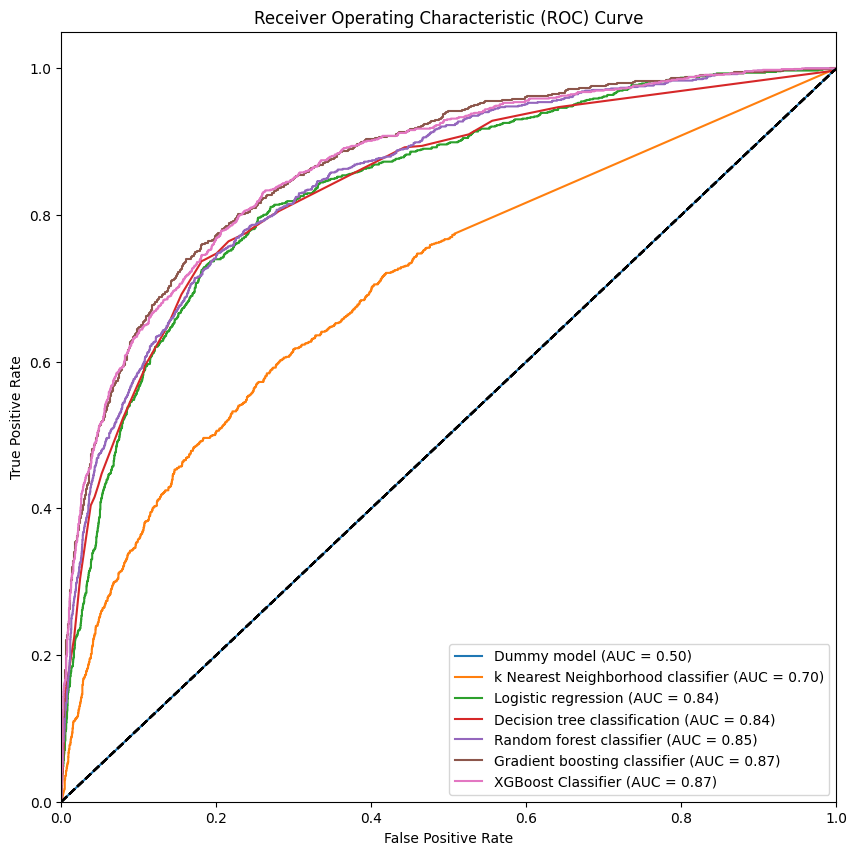

In [155]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_roc_curve(dummy_model, X_te, y_te,
               name='Dummy model', ax=ax)
plot_roc_curve(kNN, X_te, y_te, 
               name='k Nearest Neighborhood classifier', ax=ax)
plot_roc_curve(logreg, X_te, y_te, 
               name='Logistic regression', ax=ax)
plot_roc_curve(dtc, X_te, y_te,
               name='Decision tree classification', ax=ax)
plot_roc_curve(rfc, X_te, y_te, 
               name='Random forest classifier', ax=ax)
plot_roc_curve(gbc, X_te, y_te, 
               name='Gradient boosting classifier', ax=ax)
plot_roc_curve(xgb, X_te, y_te, 
               name='XGBoost Classifier', ax=ax);

### 'Final' Model: Gradient Boosting Classifier

From the ROC curves comparison above, and confusion matrix of the method, I decided to choose Gradient Boosting Classifier as my final model. 

In [156]:
final_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(learning_rate =0.1, n_estimators=200, 
                                              max_depth=5,
                                              random_state=42))
])


In [157]:
output_final_model = final_model.fit(X_tr, y_tr)

Training Scores:
Train Accuracy: 0.895933014354067
Train Precision: 0.8400783289817232
Train Recall: 0.630110159118727
Train F1-Score: 0.7201007133864876
*********
Testing Scores:
Test Accuracy: 0.8476226132534631
Test Precision: 0.7051282051282052
Test Recall: 0.48500881834215165
Test F1-Score: 0.5747126436781609
ROC-AUC: 0.7151755118326728


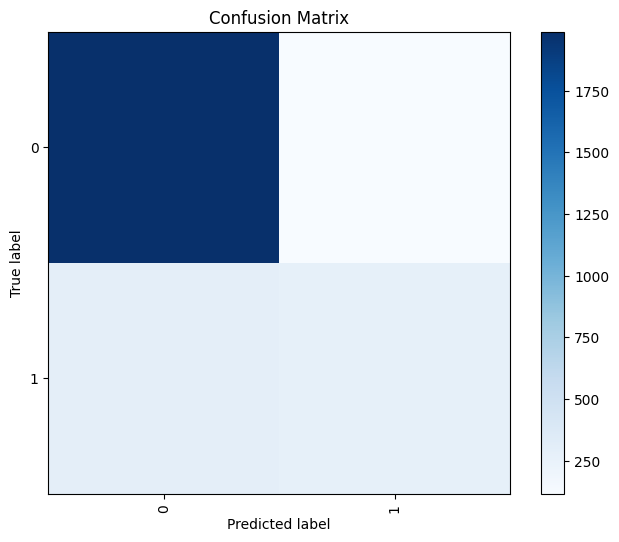

In [158]:
evaluate(final_model, X_tr, X_hold, y_tr, y_hold)

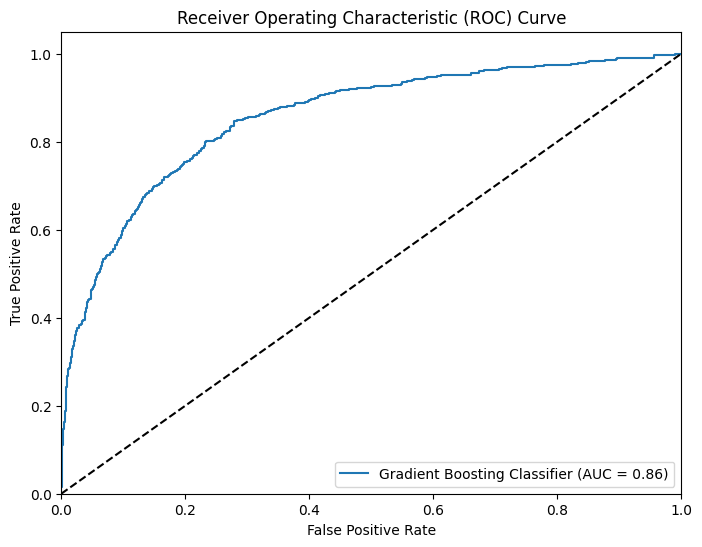

In [159]:
plot_roc_curve(final_model, X_hold, y_hold, name='Gradient Boosting Classifier');

In [160]:
# Predictions for the confusion matrix can be calculated
hold_preds_final_model = final_model.predict(X_hold)
# Confusion matrix can be computed using the predicted and actual labels
cm = confusion_matrix(y_hold, hold_preds_final_model, normalize='true')

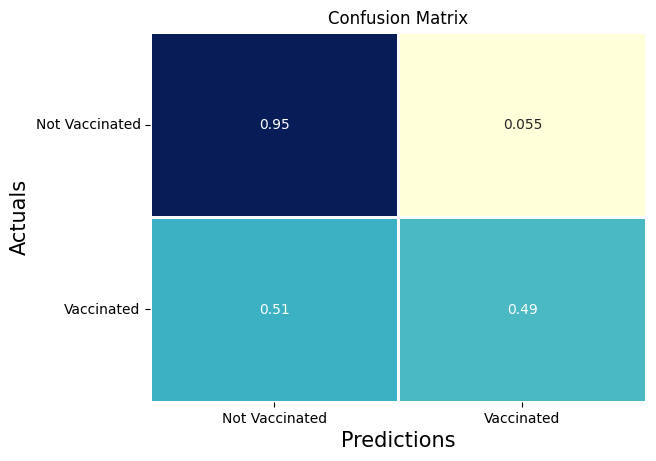

In [161]:
# A heatmap is plotted for the final model's confusion matrix to enhance visualization 
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, cbar=False, linewidths=1, cmap="YlGnBu");  

# Title and axis labels are set for the confusion matrix plot
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predictions', fontsize=15)
ax.set_ylabel('Actuals', fontsize=15)

# Tick labels for x and y axes are set
ax.xaxis.set_ticklabels(['Not Vaccinated', 'Vaccinated'])
ax.yaxis.set_ticklabels(['Not Vaccinated', 'Vaccinated'], rotation=0, fontsize=10);


 ## Evaluation
The baseline model has an accuracy score of 78%, but a score of zero for precision, recall, and f1 scores. When comparing all of the following models to this baseline, all have much better precision, recall, and f1 scores, and many have higher accuracy scores. The decision tree model is not overfitting, but it has a low precision score, as well as a low f1 score. However, it has an AUC score of 0.84, which is fairly high, meaning that it does an adequate job of maximizing true positives and minimizing false positives. The decision tree model is not overfitting. This logistic regression model has low precision and f1 scores and has an AUC equal to the decision tree AUC above. This model is not overfitting. The random forest classifier model also has low precision and f1 scores. It has an AUC score of 0.85, which is slightly better than the decision tree model above. This model is not overfitting to a great extent. The KNN model is definitely overfitting; the training data has perfect scores for all metrics, whereas the testing data scores are much lower. The AUC score is also much lower than on previous models. The Gradient Boosting model has the highest overall scores of all the models done so far and also does the best job of minimizing false positives. This is the candidate for the final model. The XG Boost model gave similar scores to the gradient boosting model, but the gradient boosting model has the best AUC score and precision score. So, the gradient boosting classifier is chosen as the final model.

The final model does not overfit to the training set; similar AUC, precision, and accuracy scores are obtained for the holdout set. Because the model does a good job of minimizing the false positive rate on the holdout data, there is fairly confidence that it will generalize well to unseen data and will accurately help public health officials determine the people who didn't get the vaccine. The feature importances will be looked into to understand the relationship between the features and vaccination behavior.

## Feature Importance

In [162]:
# The preprocessor features are assigned to the final model.
final_model['preprocessor']

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('num_imputer',
                                                  IterativeImputer(max_iter=100,
                                                                   random_state=42)),
                                                 ('minmaxscaler',
                                                  MinMaxScaler())]),
                                 ['h1n1_concern', 'h1n1_knowledge',
                                  'behavioral_antiviral_meds',
                                  'behavioral_avoidance',
                                  'behavioral_face_mask',
                                  'behavioral_wash_hands',
                                  'behavioral_large_gatherings',
                                  'behavioral_outside_home',
                                  'behavioral...
                                 ['age_group', 'education', 'race', 'sex',
                                  'income_poverty', 'marital_status',
                                  'rent_or_own', 'employment_status',
                                  'census_msa']),
                                ('freq',
                                 Pipeline(steps=[('freq_encoder',
                                                  CountEncoder(combine_min_nan_groups=True,
                                                               min_group_size=0.05,
                                                               normalize=True)),
                                                 ('freq_imputer',
                                                  IterativeImputer(max_iter=100,
                                                                   random_state=42))]),
                                 ['hhs_geo_region', 'employment_industry',
                                  'employment_occupation'])])

In [163]:
# The shape of the preprocessor transformation.
final_model['preprocessor'].fit_transform(X_tr).shape

(19228, 59)

In [164]:
# The transformed data is being examined
pd.DataFrame(final_model['preprocessor'].fit_transform(X_tr)).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58
0,1.000000,0.5,0.016076,0.963804,0.038064,0.894508,0.0,1.000000,0.0,0.116478,0.141558,1.0,0.0,1.000000,0.779010,0.75,0.296807,0.75,0.75,0.279800,0.75,0.333333,0.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.106407,0.499168,0.504213
1,0.666667,1.0,0.016076,0.000000,0.038064,0.894508,0.0,0.013143,1.0,0.116478,0.141558,0.0,0.0,0.110629,0.920662,0.75,0.765602,0.25,0.75,0.759933,0.25,0.333333,0.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.160235,0.340961,0.371854
2,0.333333,0.5,0.016076,0.963804,0.038064,0.894508,0.0,0.013143,0.0,1.000000,1.000000,0.0,0.0,0.110629,0.920662,0.75,0.296807,0.00,1.00,0.279800,0.00,0.333333,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.076659,0.499168,0.504213
3,0.333333,0.5,0.016076,0.963804,0.038064,0.894508,0.0,0.013143,1.0,0.116478,1.000000,0.0,0.0,0.110629,0.920662,0.75,0.296807,0.25,0.75,0.279800,0.25,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.160235,0.499168,0.504213
4,0.333333,1.0,0.016076,0.963804,0.038064,0.894508,0.0,0.013143,1.0,0.116478,0.141558,0.0,1.0,1.000000,0.920662,0.25,0.062409,0.00,0.75,0.279800,0.25,0.666667,0.333333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.160235,0.340961,0.371854


In [165]:
#The feature importances generated by the gradient boosting classifier are being examined
final_model['classifier'].feature_importances_

array([1.11369407e-02, 1.16157014e-02, 5.47283050e-03, 3.14729541e-03,
       5.04800053e-03, 3.02931497e-03, 2.89630135e-03, 2.99220548e-03,
       1.47893951e-03, 3.04601222e-01, 2.08170463e-02, 7.12191891e-03,
       8.33130750e-03, 3.78909965e-02, 1.63021632e-01, 1.19121025e-01,
       9.45508680e-02, 1.37427866e-02, 1.29455471e-02, 3.14717625e-02,
       1.11057019e-02, 8.96929378e-03, 7.42403029e-03, 2.67204316e-03,
       2.43354212e-03, 1.51438941e-03, 4.27999277e-03, 6.95809165e-03,
       2.25751747e-03, 5.63344331e-03, 5.39838628e-03, 1.34372476e-03,
       3.83948119e-03, 5.17723927e-03, 1.97701372e-03, 1.94393889e-03,
       2.96931711e-03, 2.42847839e-03, 2.10252323e-03, 1.54129491e-03,
       2.90384959e-03, 1.71989339e-03, 1.85018762e-03, 2.24734548e-03,
       2.15296491e-03, 2.87283750e-04, 8.71528898e-04, 2.59840772e-03,
       9.11761610e-04, 1.77066066e-03, 1.18225031e-03, 1.81431173e-03,
       1.98048835e-03, 1.86513215e-03, 1.68921617e-03, 2.29535857e-03,
      

In [166]:
# Names of the numerical columns
num_cols

['h1n1_concern',
 'h1n1_knowledge',
 'behavioral_antiviral_meds',
 'behavioral_avoidance',
 'behavioral_face_mask',
 'behavioral_wash_hands',
 'behavioral_large_gatherings',
 'behavioral_outside_home',
 'behavioral_touch_face',
 'doctor_recc_h1n1',
 'doctor_recc_seasonal',
 'chronic_med_condition',
 'child_under_6_months',
 'health_worker',
 'health_insurance',
 'opinion_h1n1_vacc_effective',
 'opinion_h1n1_risk',
 'opinion_h1n1_sick_from_vacc',
 'opinion_seas_vacc_effective',
 'opinion_seas_risk',
 'opinion_seas_sick_from_vacc',
 'household_adults',
 'household_children']

In [167]:
# Names of the frequency columns
freq_cols

['hhs_geo_region', 'employment_industry', 'employment_occupation']

In [168]:
# All columns are combined together
final_cols = []

try:
    final_cols.extend(num_cols)
    final_cols.extend(freq_cols)
except NameError:
    final_cols.extend(num_cols)
    final_cols.extend(freq_cols)

print(final_cols)


['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal', 'chronic_med_condition', 'child_under_6_months', 'health_worker', 'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults', 'household_children', 'hhs_geo_region', 'employment_industry', 'employment_occupation']


In [169]:
# The final columns and their corresponding feature importances are combined
# They are then sorted based on the feature importances
pd.DataFrame.from_dict(dict(zip(final_cols, final_model['classifier'].feature_importances_)), 
                       orient='index').sort_values(by=0, ascending=False)

,0
doctor_recc_h1n1,0.304601
health_insurance,0.163022
opinion_h1n1_vacc_effective,0.119121
opinion_h1n1_risk,0.094551
health_worker,0.037891
opinion_seas_risk,0.031472
doctor_recc_seasonal,0.020817
opinion_h1n1_sick_from_vacc,0.013743
opinion_seas_vacc_effective,0.012946
h1n1_knowledge,0.011616


In the analysis, it was observed that the importance of demographic and behavioral features is relatively lower compared to health-related factors and opinions. Factors such as doctor recommendation, possession of health insurance, perception of vaccine efficiency, and perception of H1N1 risk emerged as the most influential determinants of people's vaccination status.

## Conclusions & Recommendations

It is recommended that public health officials at the American Public Health Association (APHA) communicate to doctors the importance of recommending to patients that they receive the H1N1 vaccine. Additionally, efforts should be made to ensure accessibility to the vaccine for individuals, regardless of their health insurance status. Educational outreach initiatives should be prioritized by the APHA, as opinions on H1N1 vaccine effectiveness and the perceived risk of H1N1 to health significantly influence vaccination status.

The analysis may not fully address the goal of predicting H1N1 vaccination status due to the inability to completely eliminate false negatives, i.e., individuals predicted as not getting vaccinated but actually receiving the vaccine. Furthermore, there are other factors not addressed by the survey questions that could impact vaccination prediction.

For future steps, consideration should be given to analyzing more recent flu survey data to obtain the most up-to-date results. Additionally, further feature engineering should be conducted to enhance prediction accuracy. Finally, since the focus was solely on predicting H1N1 vaccination status, future efforts could involve predicting seasonal flu vaccine status as well.